<a href="https://colab.research.google.com/github/rsrijana/openCV/blob/main/smileDetection_with_openCv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

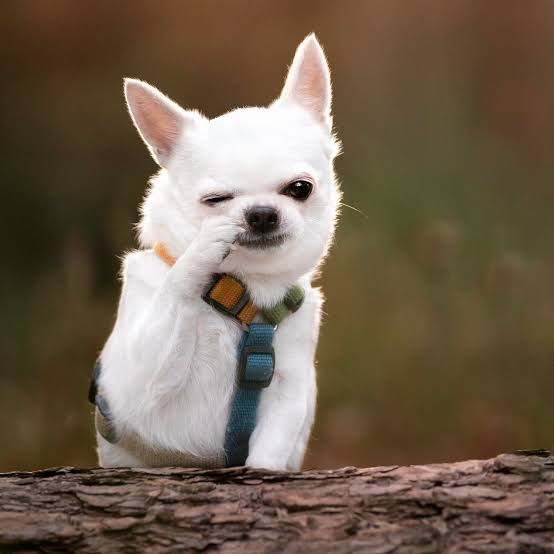

In [ ]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow

# URL of the image
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwyXeKDN29AmZgZPLS7n0Bepe8QmVappBwZCeA3XWEbWNdiDFB'

# Fetch the image from the URL
response = requests.get(image_url)
if response.status_code == 200:
    # Convert image to a numpy array and then decode it
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    if image is not None:
        # Display the image in Colab
        cv2_imshow(image)
    else:
        print("Error: Could not decode the image.")
else:
    print("Error: Could not retrieve the image. Check the URL.")


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('butterfly.jpg')  # Correctly assign to `image`

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image. Please check the path.")
else:
    # Display the image using cv2_imshow for Colab
    cv2_imshow(image)


Error: Could not load image. Please check the path.


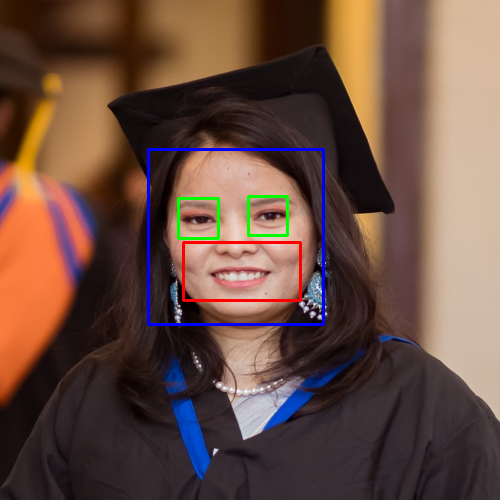

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('grad.jpg')

# Verify if the image is loaded correctly
if image is None:
    print("Error: Image not loaded. Check the path and file format.")
else:
    # Resize the image
    image = cv2.resize(image, (500, 500))  # Directly update `image` with the resized version

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the cascades
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Draw rectangles around the detected faces and features
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]

        # Detect eyes within the face
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

        # Detect smiles within the face
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)

    # Display the output using cv2_imshow for Colab
    cv2_imshow(image)
